In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp
d = np.loadtxt('sdss_cut.txt',dtype='float', skiprows=1,delimiter=',')

In [2]:
#calculate distance based on redshift z

#BA z=0.022683 95.5Mpc

def distance(z):
    H0 = 70*1000 #m s-1 mpc-1
    c = 3*10**8 #m s-1
    return print(z*c/H0,"Mpc")

distance(0.08)
distance(0.12)
distance(0.022683)

342.85714285714283 Mpc
514.2857142857143 Mpc
97.21285714285713 Mpc


In [3]:
print(d.shape, type(d),type(d[1]),type(d[1][1]))

(319958, 8) <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.float64'>


In [4]:
print(len(d[:,2]))

319958


In [5]:
RA = d[:,0]
DE = d[:,1]
Z = d[:,2]
u = d[:,3]
g = d[:,4]
r = d[:,5]
i = d[:,6]
z = d[:,7]

In [6]:
Indices = np.where((Z<0.12)&(Z>0.08))

# Task 1

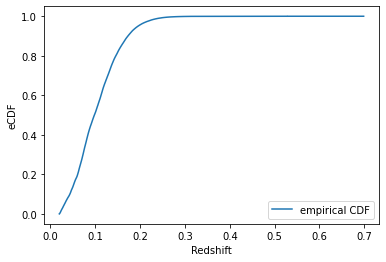

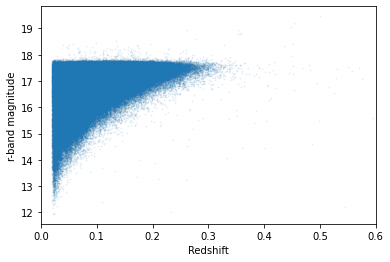

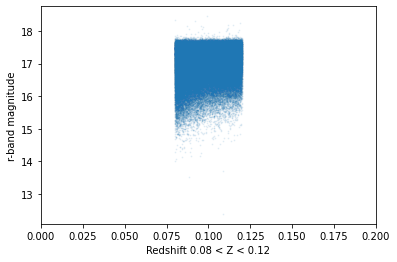

In [7]:
S_o = np.sort(Z)
fig = plt.figure()
plt.step(S_o, np.arange(len(S_o))/len(S_o), label='empirical CDF' )
plt.xlabel('Redshift')
plt.ylabel('eCDF')
plt.legend(loc='best')
plt.show()

plt.scatter(Z,r, s=0.5, alpha=0.1)
plt.xlabel('Redshift')
plt.xlim(0,0.6)
plt.ylabel('r-band magnitude')
plt.show()


Z = Z[Indices]
RA,DE,u,g,r,i,z = RA[Indices],DE[Indices],u[Indices],g[Indices],r[Indices],i[Indices],z[Indices]
plt.scatter(Z,r, s=0.5, alpha=0.1)
plt.xlabel('Redshift 0.08 < Z < 0.12')
plt.xlim(0,0.2)
plt.ylabel('r-band magnitude')
plt.show()

# Task 2

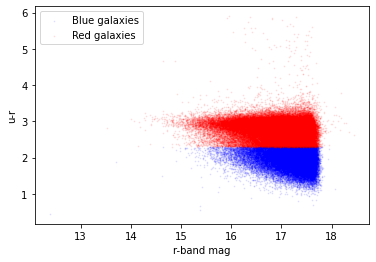

In [8]:
color = u-r
blue = np.where(color<=2.3)
red = np.where(color>2.3)

plt.scatter(r[blue],color[blue], s=0.5, alpha=0.1,color='blue',label='Blue galaxies' )
plt.scatter(r[red],color[red], s=0.5, alpha=0.1,color='red',label='Red galaxies')
plt.legend(loc='best')
plt.xlabel('r-band mag')
plt.ylabel('u-r')
plt.show()

# Task 3

In [9]:
blue_mean, red_mean = np.mean(r[blue]), np.mean(r[red])
blue_std, red_std = np.std(r[blue]), np.std(r[red])
print(blue_mean, red_mean, blue_std, red_std)

17.148581973026662 16.884902132896997 0.4317605611301002 0.5532295368731545


# Task 4

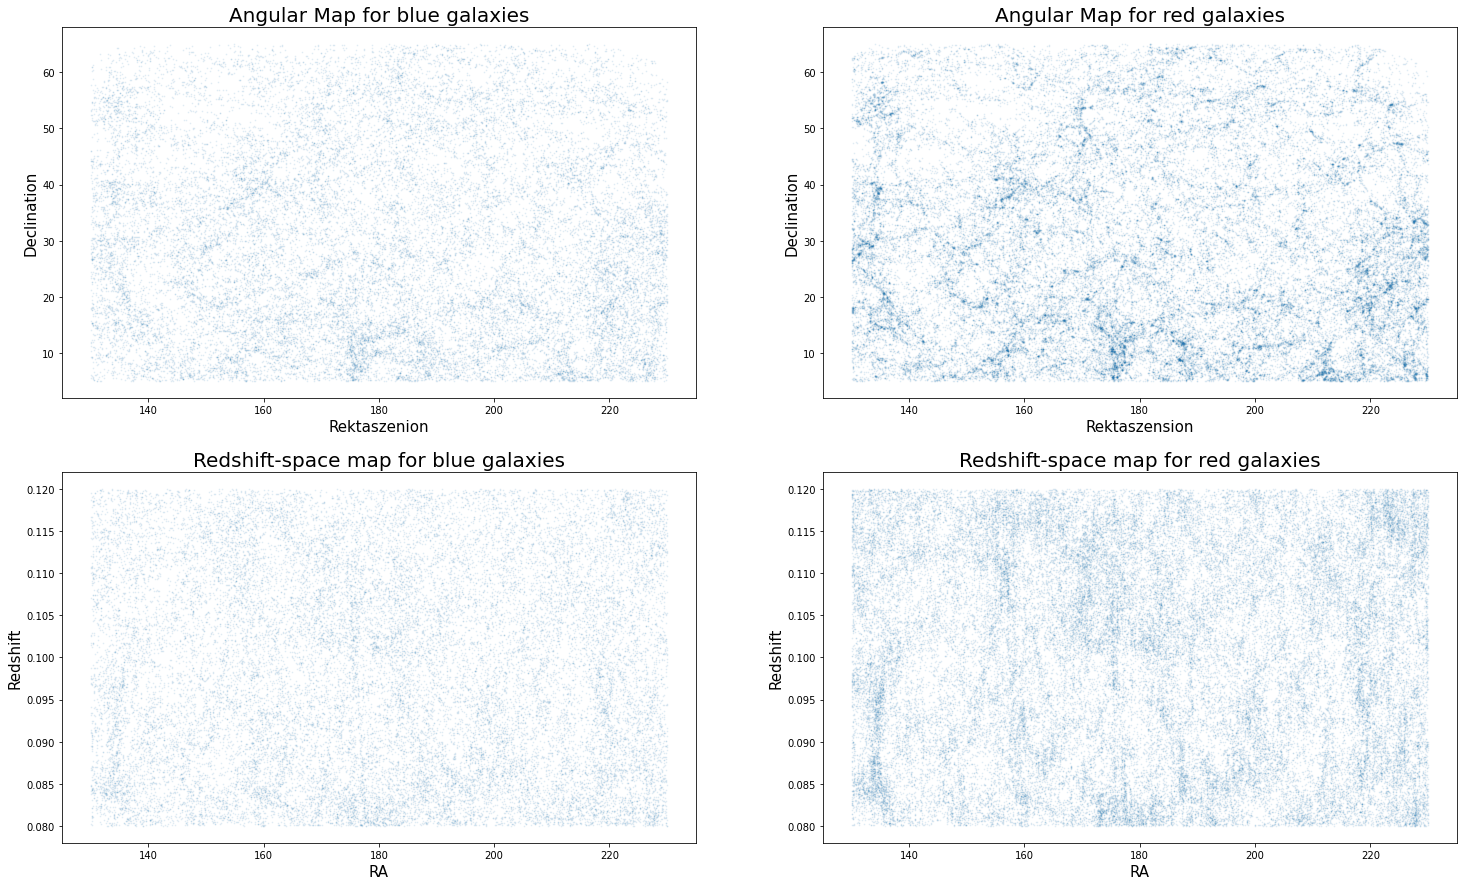

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(25,15))
plt.subplot(2,2,1)
plt.title('Angular Map for blue galaxies',fontsize=20)
plt.xlabel('Rektaszenion', fontsize=15)
plt.ylabel('Declination', fontsize=15)
plt.scatter(RA[blue], DE[blue], s=0.5, alpha=0.1)

plt.subplot(2,2,2)
plt.title('Angular Map for red galaxies',fontsize=20)
plt.xlabel('Rektaszension', fontsize=15)
plt.ylabel('Declination', fontsize=15)
plt.scatter(RA[red], DE[red], s=0.5, alpha=0.1)

plt.subplot(2,2,3)
plt.title('Redshift-space map for blue galaxies',fontsize=20)
plt.xlabel('RA', fontsize=15)
plt.ylabel('Redshift', fontsize=15)
plt.scatter(RA[blue], Z[blue], s=0.5, alpha=0.1)

plt.subplot(2,2,4)
plt.title('Redshift-space map for red galaxies',fontsize=20)
plt.xlabel('RA', fontsize=15)
plt.ylabel('Redshift', fontsize=15)
plt.scatter(RA[red], Z[red], s=0.5, alpha=0.1)

#fig.tight_layout(pad=30.0)

# Task 2.1

In [11]:
#use thinner slice but still large scale structure in the ang map

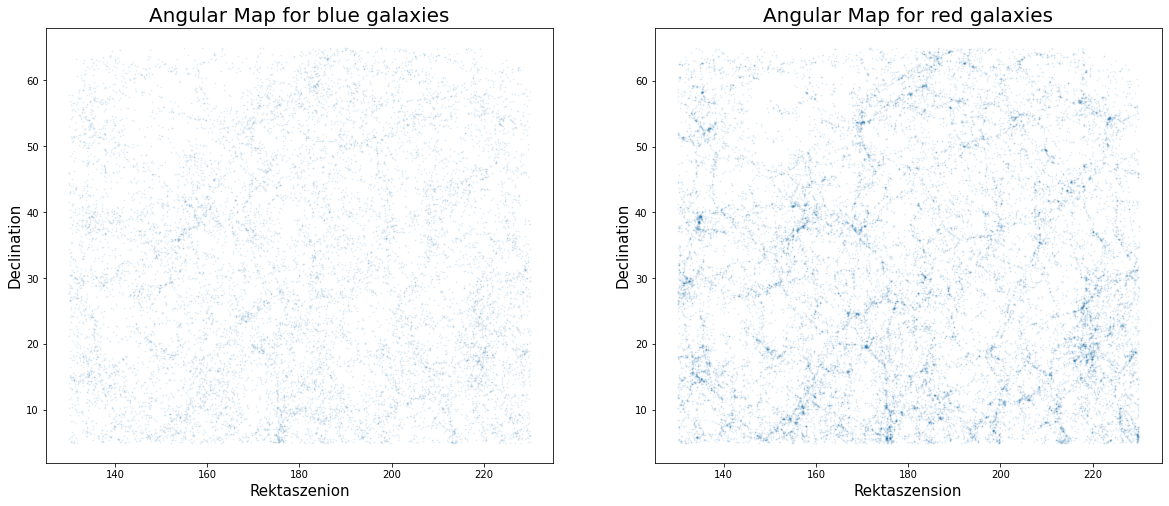

In [12]:
Indices1 = np.where((Z<0.11)&(Z>0.09))
Z, DE, RA, u, r = Z[Indices1], DE[Indices1], RA[Indices1], u[Indices1],r[Indices1]
color = u - r
blue = np.where(color<=2.3)
red = np.where(color>2.3)

fig, axs = plt.subplots(1, 2, figsize=(20,8))
plt.subplot(1,2,1)
plt.title('Angular Map for blue galaxies',fontsize=20)
plt.xlabel('Rektaszenion', fontsize=15)
plt.ylabel('Declination', fontsize=15)
plt.scatter(RA[blue], DE[blue], s=0.5, alpha=0.1)

plt.subplot(1,2,2)
plt.title('Angular Map for red galaxies',fontsize=20)
plt.xlabel('Rektaszension', fontsize=15)
plt.ylabel('Declination', fontsize=15)
plt.scatter(RA[red], DE[red], s=0.5, alpha=0.1)

# Task 2.2

Text(0.5, 1.0, 'bins=500')

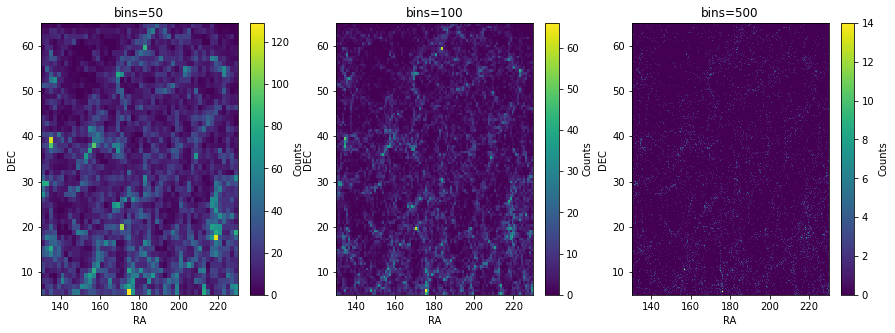

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity, NearestNeighbors
from scipy.spatial import Voronoi, voronoi_plot_2d
from scipy.spatial import ConvexHull



# Define grid for 2D histograms
#xmin, xmax = np.min(RA), np.max(RA)
#ymin, ymax = np.min(DEC), np.max(DEC)

# Plot 2D histogram with different amounts of bins

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist2d(RA, DE, bins=50, cmap='viridis')
plt.colorbar(label='Counts')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.title('bins=50')

plt.subplot(1, 3, 2)
plt.hist2d(RA, DE, bins=100, cmap='viridis')
plt.colorbar(label='Counts')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.title('bins=100')

plt.subplot(1, 3, 3)
plt.hist2d(RA, DE, bins=500, cmap='viridis')
plt.colorbar(label='Counts')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.title('bins=500')

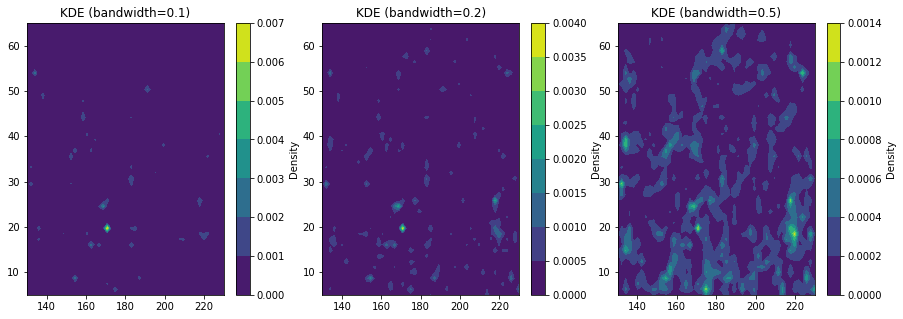

In [14]:
# KDE with different bandwidths

# define grid
xmin, xmax = np.min(RA), np.max(RA)
ymin, ymax = np.min(DE), np.max(DE)
# get the mesh points from RA and DE
bins = 50
X, Y = np.meshgrid(np.linspace(xmin, xmax, bins), np.linspace(ymin, ymax, bins))

bandwidths = [0.1, 0.2, 0.5]
plt.figure(figsize=(15, 5))
for i, bw in enumerate(bandwidths):
    # create a kernel density estimator object
    kde = KernelDensity(kernel='gaussian',bandwidth=bw)
    # create a model by 'fitting' the KDE to our data
    kde.fit(np.vstack([RA, DE]).T)
    # first flatten X and Y then stack them together to get a len(RA)+len(DE) sized array of test points
    # .T is an attribute that stands for the transpose of an array
    # It effectively swaps the rows and columns of a 2D array
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    # evaluate the KDE at the test points and reshape the result to match the shape of the meshgrid
    Z = np.exp(kde.score_samples(xy)).reshape(X.shape)
    plt.subplot(1, 3, i+1)
    # Plot filled contours of the KDE density
    plt.contourf(X, Y, Z, cmap='viridis')
    plt.colorbar(label='Density')
    plt.title(f'KDE (bandwidth={bw})')


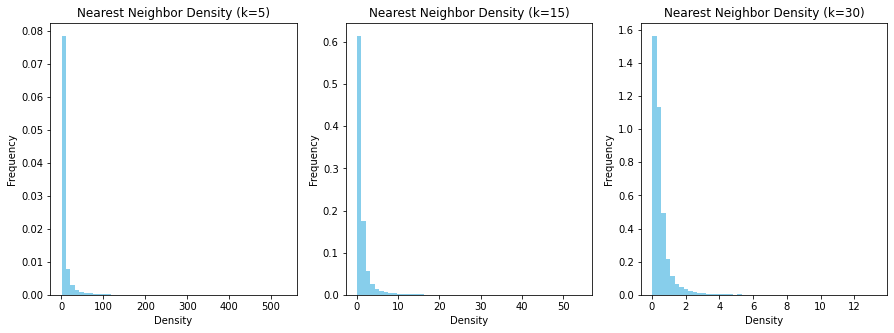

In [15]:
# Nearest neighbor density estimation with different neighbor numbers

bins= 50
neighbors = [5, 15, 30]
plt.figure(figsize=(15, 5))
for i, n in enumerate(neighbors):
    # create nearest neighbor object
    nn = NearestNeighbors(n_neighbors=n, algorithm='ball_tree')
    # fit the model to our data
    nn.fit(np.vstack([RA, DE]).T)
    # evaluate
    distances, _ = nn.kneighbors()
    # turn the distances into a density estimate
    # **2 bc we are in 2dim
    # we are considering a circular area around each point, 
    # with the radius being the distance to its k-th nearest neighbor
    density = 1 / (np.pi * distances[:, -1]**2)
    plt.subplot(1, 3, i +1)
    plt.hist(density, bins=bins, density=True, color='skyblue')
    plt.xlabel('Density')
    plt.ylabel('Frequency')
    plt.title(f'Nearest Neighbor Density (k={n})')




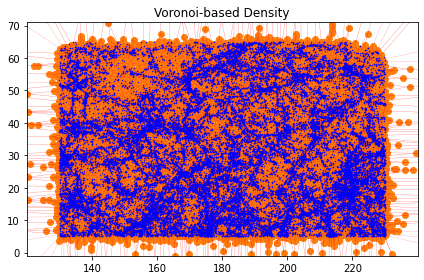

In [16]:
# Voronoi-based density estimation

vor = Voronoi(np.vstack([RA, DE]).T)

def voronoi_volumes(v:Voronoi):
    vol = np.zeros(v.npoints)
    for i, reg_num in enumerate(v.point_region):
        indices = v.regions[reg_num]
        if -1 in indices or len(indices)==0:
            vol[i]=np.inf
        else:
            vol[i]=ConvexHull(v.vertices[indices]).volume
    return vol
    
voronoi_volumes(vor)  

voronoi_plot_2d(vor, show_vertices=True, line_colors='red', line_width=0.2, line_alpha=0.9, point_size=0.2)
plt.plot(RA, DE, 'o', color='blue', markersize=0.5)
plt.title('Voronoi-based Density')

plt.tight_layout()
plt.show()

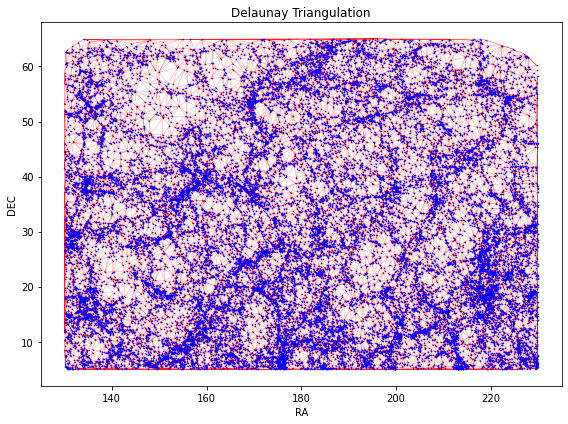

In [17]:
from scipy.spatial import Delaunay

tri = Delaunay(np.vstack([RA, DE]).T)

# Plot Delaunay triangulation
plt.figure(figsize=(8, 6))
plt.triplot(RA, DE, tri.simplices, color='red', linewidth=0.2, alpha=0.9)
plt.plot(RA, DE, 'o', color='blue', markersize=0.5)
plt.title('Delaunay Triangulation')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.tight_layout()
plt.show()

# Task 2. 3

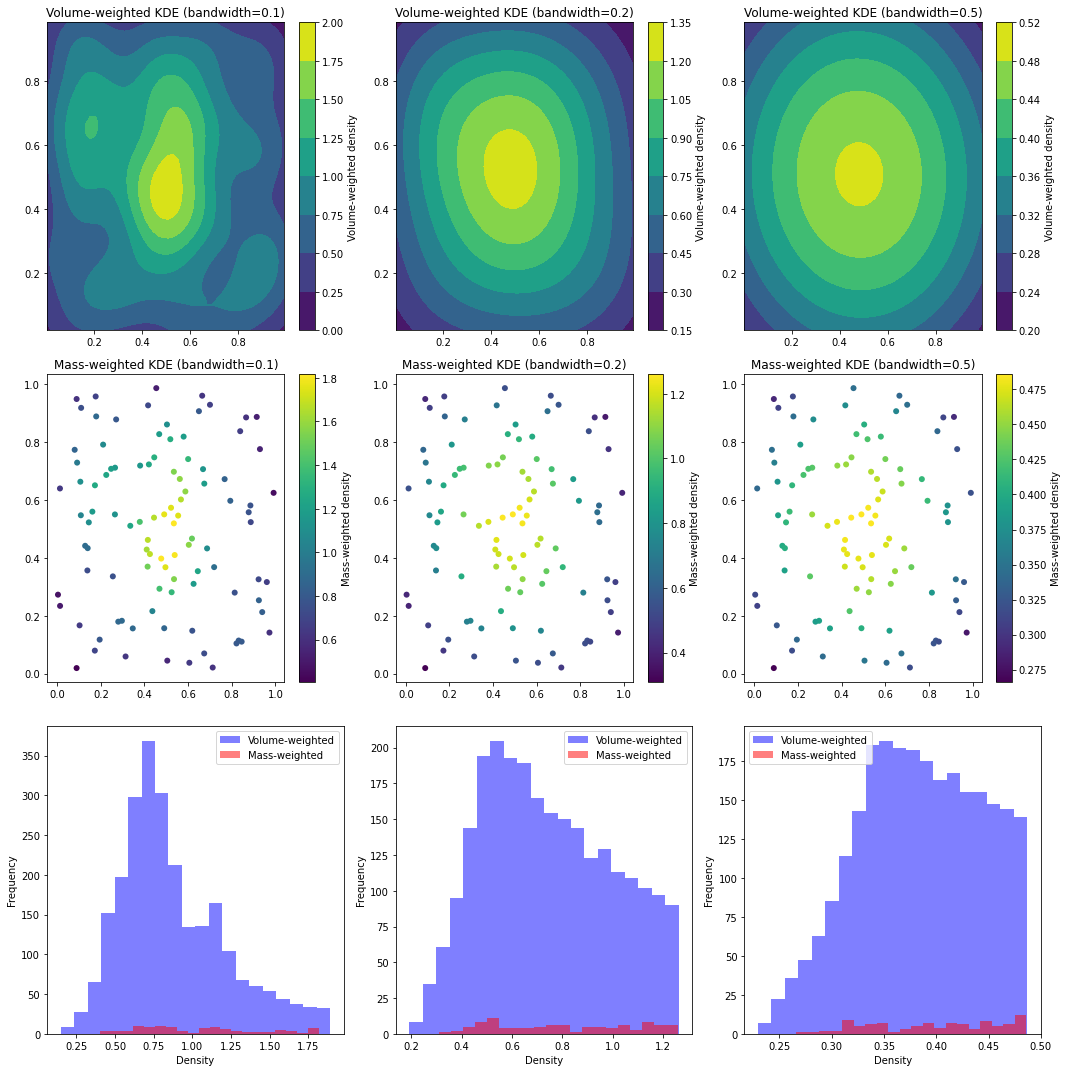

In [22]:
# KDE map for volume weighted statistics vs. mass weighted statistics
# volume weighted = test points uniformly distributed in space
# mass weighted = test points drawn from the distribution itself

# Define grid
xmin, xmax = np.min(RA), np.max(RA)
ymin, ymax = np.min(DE), np.max(DE)
bins = 50
X, Y = np.meshgrid(np.linspace(xmin, xmax, bins), np.linspace(ymin, ymax, bins))

# KDE with different bandwidths
bandwidths = [0.1, 0.2, 0.5]
plt.figure(figsize=(15, 15))

for i, bw in enumerate(bandwidths):
    # Create a kernel density estimator object
    kde = KernelDensity(kernel='gaussian', bandwidth=bw)
    # Fit the KDE to our data
    kde.fit(np.vstack([RA, DE]).T)

    # First, evaluate the KDE at uniformly spaced test points = test points are uniformly distributed in space
    # (volume-weighted statistics)
    xy_uniform = np.vstack([X.ravel(), Y.ravel()]).T
    density_uniform = np.exp(kde.score_samples(xy_uniform))
    Z_uniform = density_uniform.reshape(X.shape)

    # Plot volume-weighted KDE contour
    plt.subplot(3, len(bandwidths), i + 1)
    plt.contourf(X, Y, Z_uniform, cmap='viridis')
    plt.colorbar(label='Volume-weighted density')
    plt.title(f'Volume-weighted KDE (bandwidth={bw})')

    # Second, evaluate the KDE at the galaxy positions themselves = drawn from distribution
    # (mass-weighted statistics)
    density_mass = np.exp(kde.score_samples(np.vstack([RA, DE]).T))

    # Plot mass-weighted KDE contour
    plt.subplot(3, len(bandwidths), len(bandwidths) + i + 1)
    plt.scatter(RA, DE, c=density_mass, cmap='viridis', edgecolors='none')
    plt.colorbar(label='Mass-weighted density')
    plt.title(f'Mass-weighted KDE (bandwidth={bw})')

    # Plot histograms for volume-weighted and mass-weighted statistics
    plt.subplot(3, len(bandwidths), 2 * len(bandwidths) + i + 1)
    plt.hist(density_uniform, bins=20, alpha=0.5, color='blue', label='Volume-weighted')
    plt.hist(density_mass, bins=20, alpha=0.5, color='red', label='Mass-weighted')
    plt.xlabel('Density')
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()


# Task 4

In [24]:
from scipy.stats import ks_2samp

# Bandwidth for KDE
bandwidth = 0.1

# Number of slices
num_slices = 20

# Start with Red
# Define grid
xmin, xmax = np.min(RA[red]), np.max(RA[red])
ymin, ymax = np.min(DE[red]), np.max(DE[red])
bins = 50
X, Y = np.meshgrid(np.linspace(xmin, xmax, bins), np.linspace(ymin, ymax, bins))

# Generate multiple independent slices for red and blue galaxies
red_slices = np.array_split(np.vstack([RA[red], DE[red]]).T, num_slices)
blue_slices = np.array_split(np.vstack([RA[blue], DE[blue]]).T, num_slices)

# Plot conditional density estimates for red galaxies
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Conditional Density Estimates for Red Galaxies')
for i, slice in enumerate(red_slices):
    kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth)
    kde.fit(slice)  # No need to reshape
    XY = np.column_stack([X.ravel(), Y.ravel()])
    density = np.exp(kde.score_samples(XY))
    plt.hist(density, bins=20, alpha=0.5, label=f'Slice {i+1}')
plt.xlabel('Density')
plt.ylabel('Frequency')
plt.legend()

# Plot conditional density estimates for blue galaxies
plt.subplot(1, 2, 2)
plt.title('Conditional Density Estimates for Blue Galaxies')
for i, slice in enumerate(blue_slices):
    kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth)
    kde.fit(slice)  # No need to reshape
    XY = np.column_stack([X.ravel(), Y.ravel()])
    density = np.exp(kde.score_samples(XY))
    plt.hist(density, bins=20, alpha=0.5, label=f'Slice {i+1}')
plt.xlabel('Density')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

# Perform Kolmogorov-Smirnov test
ks_statistic, p_value = ks_2samp(red_slices, blue_slices)
print(f'KS statistic: {ks_statistic}')
print(f'P-value: {p_value}')


IndexError: index 100 is out of bounds for axis 0 with size 100